This dataset is a selective archive of Maryland state public
salary information compiled by The Baltimore Sun Media Group for the year 2018. 

#### (1) Import Libraries for operations

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

#### (2) Read csv file

In [2]:
#print(os.listdir())
dataframe = pd.read_csv('./md2018-salary-md.csv') #load the CSV File.
dataframe.info() #get info about the table eg. Datatypes and name.

/Users/krutalpatel/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,6,7,10,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998747 entries, 0 to 998746
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_name          109075 non-null  object 
 1   middle_initial      86653 non-null   object 
 2   last_name           109071 non-null  object 
 3   suffix              2777 non-null    object 
 4   system              109102 non-null  object 
 5   agency              109078 non-null  float64
 6   organization        109102 non-null  object 
 7   subtitle            109102 non-null  object 
 8   class_code          109102 non-null  float64
 9   annual_salary       109102 non-null  float64
 10  pay_rate            109102 non-null  object 
 11  regular_earnings    109102 non-null  float64
 12  overtime_earnings   109102 non-null  float64
 13  other_earnings      109102 non-null  float64
 14  ytd_gross_earnings  109102 non-null  float64
 15  hire_date           109102 non-nul

In [3]:
dataframe.head() #shows the sample data

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date,term_date
0,DANIEL,NaN,STAPLES,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,79000.0,A,34000.0,0.0,4000.0,37000.0,5/23/18,0
1,RUBEENA,NaN,ISMAIL,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,58000.0,A,13000.0,0.0,0.0,13000.0,9/12/18,0
2,NICOLE,U,BECKETTS,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,99000.0,A,99000.0,0.0,0.0,99000.0,12/10/98,0
3,ELISABETH,C,MACKEY,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,75000.0,A,75000.0,0.0,2000.0,76000.0,10/18/95,0
4,PAUL,E,SHIVELY,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,90000.0,A,10000.0,0.0,0.0,10000.0,11/7/18,0


In [4]:
#show the column names
#dataframe.columns

#### (4) Find NaN Values

In [5]:
dataframe.isnull().sum()

first_name            889672
middle_initial        912094
last_name             889676
suffix                995970
system                889645
agency                889669
organization          889645
subtitle              889645
class_code            889645
annual_salary         889645
pay_rate              889645
regular_earnings      889645
overtime_earnings     889645
other_earnings        889645
ytd_gross_earnings    889645
hire_date             889645
term_date             889645
dtype: int64

#### (5) Remove All Rows which contains multiple NaN Values.

In [6]:
df = dataframe.dropna(thresh=len(dataframe.columns)-1) #thresh requires when too many non NA values.
df

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date,term_date
2,NICOLE,U,BECKETTS,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,99000.0,A,99000.0,0.0,0.0,99000.0,12/10/98,0
3,ELISABETH,C,MACKEY,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,75000.0,A,75000.0,0.0,2000.0,76000.0,10/18/95,0
4,PAUL,E,SHIVELY,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,90000.0,A,10000.0,0.0,0.0,10000.0,11/7/18,0
5,ELENA,M,BERROCAL,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,51000.0,A,51000.0,0.0,5000.0,55000.0,7/30/12,0
6,NANA,K,GYESIE,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,77000.0,A,77000.0,0.0,0.0,77000.0,2/10/03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109097,KATHLEEN,A,EVANS,NaN,RG,220600.0,WORKERS' COMPENSATION COM,220600,7135.0,146000.0,A,143000.0,0.0,0.0,143000.0,3/23/15,0
109098,STELLA,M,PETERSEN,NaN,RG,220600.0,WORKERS' COMPENSATION COM,220600,3492.0,44000.0,A,22000.0,0.0,0.0,22000.0,7/30/14,0
109099,DERRY,K,PEMBERTON,NaN,RG,220600.0,WORKERS' COMPENSATION COM,220600,4547.0,55000.0,A,55000.0,0.0,0.0,55000.0,3/1/00,0
109100,MARTINA,Y,HYDE,NaN,RG,220600.0,WORKERS' COMPENSATION COM,220600,1376.0,29000.0,A,1000.0,0.0,0.0,1000.0,12/5/18,0


In [7]:
df.isnull().sum()

first_name                0
middle_initial          308
last_name                 1
suffix                84180
system                    0
agency                    0
organization              0
subtitle                  0
class_code                0
annual_salary             0
pay_rate                  0
regular_earnings          0
overtime_earnings         0
other_earnings            0
ytd_gross_earnings        0
hire_date                 0
term_date                 0
dtype: int64

#### (6) Remove term_date and suffix because majority of the fields have NaN or 0 values.

In [8]:
df = df.drop(['term_date','suffix '], axis=1)
df

,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date
2,NICOLE,U,BECKETTS,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,99000.0,A,99000.0,0.0,0.0,99000.0,12/10/98
3,ELISABETH,C,MACKEY,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,75000.0,A,75000.0,0.0,2000.0,76000.0,10/18/95
4,PAUL,E,SHIVELY,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,90000.0,A,10000.0,0.0,0.0,10000.0,11/7/18
5,ELENA,M,BERROCAL,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,51000.0,A,51000.0,0.0,5000.0,55000.0,7/30/12
6,NANA,K,GYESIE,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,77000.0,A,77000.0,0.0,0.0,77000.0,2/10/03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109097,KATHLEEN,A,EVANS,RG,220600.0,WORKERS' COMPENSATION COM,220600,7135.0,146000.0,A,143000.0,0.0,0.0,143000.0,3/23/15
109098,STELLA,M,PETERSEN,RG,220600.0,WORKERS' COMPENSATION COM,220600,3492.0,44000.0,A,22000.0,0.0,0.0,22000.0,7/30/14
109099,DERRY,K,PEMBERTON,RG,220600.0,WORKERS' COMPENSATION COM,220600,4547.0,55000.0,A,55000.0,0.0,0.0,55000.0,3/1/00
109100,MARTINA,Y,HYDE,RG,220600.0,WORKERS' COMPENSATION COM,220600,1376.0,29000.0,A,1000.0,0.0,0.0,1000.0,12/5/18


#### (7) Recheck NaN Values

In [9]:
df.isnull().sum()

first_name              0
middle_initial        308
last_name               1
system                  0
agency                  0
organization            0
subtitle                0
class_code              0
annual_salary           0
pay_rate                0
regular_earnings        0
overtime_earnings       0
other_earnings          0
ytd_gross_earnings      0
hire_date               0
dtype: int64

#### (8) Replace NaN with Undefined in middle_initial and last_name because they have still some NaN Values. 

In [10]:
df.loc[:,'middle_initial':'last_name'] = df.loc[:,'middle_initial':'last_name'].fillna('Undefined')

#### (9) Recheck NaN Values

In [11]:
df.isnull().sum()

first_name            0
middle_initial        0
last_name             0
system                0
agency                0
organization          0
subtitle              0
class_code            0
annual_salary         0
pay_rate              0
regular_earnings      0
overtime_earnings     0
other_earnings        0
ytd_gross_earnings    0
hire_date             0
dtype: int64

In [12]:
df.to_csv('updated_dataset.csv') #save new cleaned dataset in other csv file.

#### (10) This is visulaization of the empty values. This is a heat map of empty values in dataset.
##### - If this is a pink that means there is no any empty values.


<AxesSubplot:>

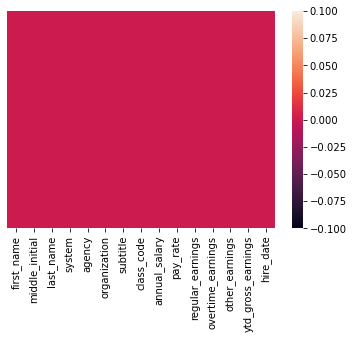

In [13]:
sns.heatmap(df.isnull(), yticklabels=False)
#sns.heatmap(df.isnull(), yticklabels=False, annot=True)

#### (11) Number of people in each system

In [14]:
df['system'].value_counts()

RG    51827
UM    35130
Name: system, dtype: int64

#### (12) types and count(using sns countplot) of pay_rates.

In [15]:
df['pay_rate'].unique()

array(['A', 'H', 'D'], dtype=object)

<AxesSubplot:xlabel='pay_rate', ylabel='count'>

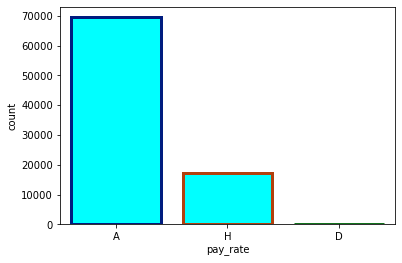

In [16]:
sns.countplot(x="pay_rate", data=df, facecolor=(0, 1, 1, 1), linewidth=3, edgecolor=sns.color_palette("dark", 3))

In [17]:
#pay_rate = df.pay_rate
#organization = df.organization

#f = plt.figure()
#f.set_figwidth(4)
#f.set_figheight(14)

#plt.plot(pay_rate, organization)
#plt.show()

#### (13) Show total number of agency. 

In [18]:
print('Total Agencies:', df['agency'].nunique())

Total Agencies: 240


#### (14) Show total number of class codes. 

In [19]:
print('Tital Class Codes:', df['class_code'].nunique())

Tital Class Codes: 2451


#### (15) Show different types of organizations and also highest number of employees in organization

In [20]:
print("Total organizations:", df['organization'].nunique())
df['organization'].value_counts().head(10)

Total organizations: 74


UNIVERSITY OF MARYLAND            35130
MARYLAND DEPARTMENT OF HEALTH      7379
DEPARTMENT OF TRANSPORTATION       6877
DEPT OF PUB SAFETY & COR SERVS     5978
MD DEPT OF HUMAN SERVICES          5177
STATE UNIVERSITIES & COLLEGES      4146
JUDICIARY                          3429
DEPARTMENT OF STATE POLICE         2131
DEPT OF PUB SAFETY & COR SERV      1728
DEPT OF JUVENILE SERVICES          1623
Name: organization, dtype: int64

#### (16) Person Who has Highest amount of earnings in Maryland.

In [21]:
df[df['ytd_gross_earnings']==df['ytd_gross_earnings'].max()]

,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date
84999,DANIEL,J,DURKIN,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1212.0,864000.0,A,507000.0,0.0,4286000.0,4793000.0,12/3/15


#### (17) List of people by their earnings in the year 2018.

In [22]:
df.sort_values(by=['ytd_gross_earnings'], ascending=False)

,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date
84999,DANIEL,J,DURKIN,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1212.0,864000.0,A,507000.0,0.0,4286000.0,4793000.0,12/3/15
87223,BRENDA,S,FRESE,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1212.0,550000.0,A,535000.0,0.0,652000.0,1186000.0,4/3/02
85194,MATHEW,R,CANADA,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1212.0,450000.0,A,414000.0,0.0,715000.0,1129000.0,1/23/18
60918,BARTLEY,P,GRIFFITH,UM,360221.0,UNIVERSITY OF MARYLAND,360221-UMB,1212.0,980000.0,A,967000.0,0.0,0.0,967000.0,11/1/01
65771,JAY,A,PERMAN,UM,360221.0,UNIVERSITY OF MARYLAND,360221-UMB,1212.0,860000.0,A,858000.0,0.0,102000.0,959000.0,2/8/99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103113,NICOLAS,M,JOHNSON,UM,360231.0,UNIVERSITY OF MARYLAND,360231-UMBC,1212.0,25000.0,A,0.0,0.0,0.0,0.0,7/1/08
71635,GREGORY,M,HAMPSON,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1111.0,0.0,H,0.0,0.0,0.0,0.0,9/15/18
97173,SARAH,P,LABELLA,UM,360230.0,UNIVERSITY OF MARYLAND,360230-UMUC,1111.0,0.0,H,0.0,0.0,0.0,0.0,4/13/15
80344,DAVID,K,REGENOLD,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1111.0,0.0,H,0.0,0.0,0.0,0.0,3/15/18


#### (18) List and Number of people who have O earnings.

In [23]:
print('Total Number of people who have 0 earnings:', sum(df['ytd_gross_earnings'] == 0))
df[df['ytd_gross_earnings'] == 0]

Total Number of people who have 0 earnings: 4017


,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date
37,PETERS,C,NWAFOR,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,8990.0,0.0,H,0.0,0.0,0.0,0.0,1/27/15
498,DAVID,M,HILDEBRAND,RG,240101.0,COMPTROLLER OF MARYLAND,240101 OFFICE OF COMPTROLLER,5482.0,111000.0,A,0.0,0.0,0.0,0.0,1/1/97
521,PAMELA,J,BOWSER,RG,240102.0,COMPTROLLER OF MARYLAND,240102 GENERAL ACCOUNTING DIV,4518.0,29000.0,A,0.0,0.0,0.0,0.0,2/3/16
552,BETTINA,L,MONTEZ,RG,240104.0,COMPTROLLER OF MARYLAND,240104 REVENUE ADMIN DIVISION,5361.0,0.0,H,0.0,0.0,0.0,0.0,2/17/16
562,AISHA,J,DEMAS,RG,240104.0,COMPTROLLER OF MARYLAND,240104 REVENUE ADMIN DIVISION,5361.0,0.0,H,0.0,0.0,0.0,0.0,11/23/16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108901,TAE,H,KEUM,UM,360292.0,UNIVERSITY OF MARYLAND,360292-UMCP(NRA),1111.0,0.0,H,0.0,0.0,0.0,0.0,10/16/16
108913,RUBEN,E,ROJAS GARCIA,UM,360292.0,UNIVERSITY OF MARYLAND,360292-UMCP(NRA),1111.0,0.0,H,0.0,0.0,0.0,0.0,1/8/17
108939,DANIELA,S,SAEZ CABEZAS,UM,360292.0,UNIVERSITY OF MARYLAND,360292-UMCP(NRA),1111.0,0.0,H,0.0,0.0,0.0,0.0,2/19/17
108967,LUCIA,F,CHARUN ILLESCAS,UM,360292.0,UNIVERSITY OF MARYLAND,360292-UMCP(NRA),1111.0,0.0,H,0.0,0.0,0.0,0.0,3/23/14


#### (19) List and Number of people who have OTHER Earnings.

In [24]:
print('Total Number of people who have OTHER earnings:', sum(df['other_earnings'] != 0))
df[df['other_earnings'] != 0]

Total Number of people who have OTHER earnings: 35847


,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date
3,ELISABETH,C,MACKEY,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,75000.0,A,75000.0,0.0,2000.0,76000.0,10/18/95
5,ELENA,M,BERROCAL,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,51000.0,A,51000.0,0.0,5000.0,55000.0,7/30/12
29,JAMES,C,GOETZ,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,42000.0,A,42000.0,0.0,2000.0,44000.0,1/4/11
53,KATHLEEN,A,KENNEDY,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9005.0,90000.0,A,86000.0,0.0,3000.0,89000.0,7/1/90
74,MARK,T,DIXON,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,41000.0,A,40000.0,1000.0,3000.0,44000.0,4/28/08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108929,DAE,H,NOH,UM,360292.0,UNIVERSITY OF MARYLAND,360292-UMCP(NRA),1111.0,0.0,H,0.0,0.0,8000.0,8000.0,5/13/18
108966,NANA,A,QUAICOE,UM,360292.0,UNIVERSITY OF MARYLAND,360292-UMCP(NRA),1111.0,0.0,H,0.0,0.0,3000.0,3000.0,6/24/18
108982,SARIAH,F,PENESE,UM,360295.0,UNIVERSITY OF MARYLAND,360295-UMBC(NRA),1111.0,0.0,H,0.0,0.0,9000.0,9000.0,6/1/18
108984,KELECHI,P,NWANAGA,UM,360295.0,UNIVERSITY OF MARYLAND,360295-UMBC(NRA),1111.0,0.0,H,0.0,0.0,10000.0,10000.0,1/28/18


#### (20) List and Number of people who have OVERTIME Earnings.

In [25]:
print('Total Number of people who have OVERTIME earnings:', sum(df['overtime_earnings'] != 0))
df[df['overtime_earnings'] != 0]

Total Number of people who have OVERTIME earnings: 18772


,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date
74,MARK,T,DIXON,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,41000.0,A,40000.0,1000.0,3000.0,44000.0,4/28/08
104,MICHELLE,V,MASON,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,37000.0,A,36000.0,2000.0,0.0,38000.0,6/4/14
144,CLINTON,R,WILLIAMS,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,42000.0,A,42000.0,1000.0,0.0,43000.0,10/2/98
145,EDWARD,I,CARRINGTON,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,44000.0,A,44000.0,1000.0,3000.0,47000.0,4/12/17
211,KIMBERLY,J,WOOLFORD,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,45000.0,A,45000.0,1000.0,0.0,46000.0,12/13/99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108990,TARA,D,BATES,RG,220600.0,WORKERS' COMPENSATION COM,220600,1756.0,47000.0,A,47000.0,1000.0,0.0,48000.0,4/9/08
108991,PAMELA,S,PAZDA,RG,220600.0,WORKERS' COMPENSATION COM,220600,3232.0,65000.0,A,64000.0,1000.0,0.0,66000.0,6/8/94
108998,KEVIN,D,WATKINS,RG,220600.0,WORKERS' COMPENSATION COM,220600,1042.0,48000.0,A,48000.0,1000.0,1000.0,49000.0,5/17/06
109065,TERESA,A,PALUGI,RG,220600.0,WORKERS' COMPENSATION COM,220600,1043.0,56000.0,A,55000.0,1000.0,0.0,56000.0,11/5/86


#### (21) List and Number of people who have REGULAR earnings.

In [26]:
print('Total Number of people who have REGULAR earnings:', sum(df['regular_earnings'] != 0))
df[df['regular_earnings'] != 0]

Total Number of people who have REGULAR earnings: 71738


,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date
2,NICOLE,U,BECKETTS,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,99000.0,A,99000.0,0.0,0.0,99000.0,12/10/98
3,ELISABETH,C,MACKEY,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,75000.0,A,75000.0,0.0,2000.0,76000.0,10/18/95
4,PAUL,E,SHIVELY,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,90000.0,A,10000.0,0.0,0.0,10000.0,11/7/18
5,ELENA,M,BERROCAL,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,51000.0,A,51000.0,0.0,5000.0,55000.0,7/30/12
6,NANA,K,GYESIE,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,77000.0,A,77000.0,0.0,0.0,77000.0,2/10/03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109097,KATHLEEN,A,EVANS,RG,220600.0,WORKERS' COMPENSATION COM,220600,7135.0,146000.0,A,143000.0,0.0,0.0,143000.0,3/23/15
109098,STELLA,M,PETERSEN,RG,220600.0,WORKERS' COMPENSATION COM,220600,3492.0,44000.0,A,22000.0,0.0,0.0,22000.0,7/30/14
109099,DERRY,K,PEMBERTON,RG,220600.0,WORKERS' COMPENSATION COM,220600,4547.0,55000.0,A,55000.0,0.0,0.0,55000.0,3/1/00
109100,MARTINA,Y,HYDE,RG,220600.0,WORKERS' COMPENSATION COM,220600,1376.0,29000.0,A,1000.0,0.0,0.0,1000.0,12/5/18


#### (22) List and Number of people who have overtime earnings,other earnings, and regular earnings.

In [27]:
print('Total Number of people who have All types of earnings:', sum((df["overtime_earnings"] != 0) & (df["other_earnings"] != 0) & (df["regular_earnings"] != 0)))
df[(df["overtime_earnings"] != 0) & (df["other_earnings"] != 0) & (df["regular_earnings"] != 0)]

Total Number of people who have All types of earnings: 12899


,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date
74,MARK,T,DIXON,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,41000.0,A,40000.0,1000.0,3000.0,44000.0,4/28/08
145,EDWARD,I,CARRINGTON,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,44000.0,A,44000.0,1000.0,3000.0,47000.0,4/12/17
807,RICHARD,G,HARPER,RG,240104.0,COMPTROLLER OF MARYLAND,240104 REVENUE ADMIN DIVISION,1370.0,26000.0,A,25000.0,2000.0,1000.0,28000.0,12/14/15
868,LUCIAANA,M,BACA-HAGER,RG,240104.0,COMPTROLLER OF MARYLAND,240104 REVENUE ADMIN DIVISION,122.0,38000.0,A,38000.0,2000.0,2000.0,41000.0,1/18/17
1372,VINCENT,T,ALLEN,RG,240106.0,COMPTROLLER OF MARYLAND,240106 FIELD ENFORCEMENT DIV,873.0,54000.0,A,54000.0,1000.0,3000.0,57000.0,11/11/90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107163,TIMOTHY,L,SEABREASE,UM,360234.0,UNIVERSITY OF MARYLAND,360234-UMCES,1212.0,38000.0,A,38000.0,700.0,2000.0,40000.0,7/7/99
107177,ROGER,D,GARNER,UM,360234.0,UNIVERSITY OF MARYLAND,360234-UMCES,1212.0,54000.0,A,53000.0,1500.0,3000.0,58000.0,3/13/06
107194,CHRISTOPHER,R,FARNELL,UM,360234.0,UNIVERSITY OF MARYLAND,360234-UMCES,1212.0,45000.0,A,43000.0,1300.0,2000.0,46000.0,9/25/89
107228,GORDON,I,DAWSON,UM,360234.0,UNIVERSITY OF MARYLAND,360234-UMCES,1212.0,48000.0,A,48000.0,1100.0,2000.0,51000.0,8/6/01


#### (23) Mean Salary by group of organization.

In [28]:
df.groupby(['organization'],as_index=True).ytd_gross_earnings.mean().round(2)

organization
BALTO CITY COMMUNITY COLLEGE      56708.81
BD-MD TCHR&ST EMP SUPP RET PLN    62916.67
BOARD OF PUBLIC WORKS             73750.00
CANAL PLACE PRESERV & DEV AUTH    49000.00
COMPTROLLER OF MARYLAND           46053.97
                                    ...   
STATE TREASURER                   69297.87
STATE UNIVERSITIES & COLLEGES     66073.08
SUBSEQUENT INJURY FUND            72000.00
UNIVERSITY OF MARYLAND            39856.79
WORKERS' COMPENSATION COM         56053.76
Name: ytd_gross_earnings, Length: 74, dtype: float64

In [29]:
df.ytd_gross_earnings.mean() #mean value of gross earnings

51160.2056188691

#### (24) List of people, who's gross earnings is more than an average(mean) value.

In [30]:
print("Number of people who's Salary is more then their mean value: ",sum(df['ytd_gross_earnings'] >= df.ytd_gross_earnings.mean()))
df[df['ytd_gross_earnings'] >= df.ytd_gross_earnings.mean()]

Number of people who's Salary is more then their mean value:  39567


,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date
2,NICOLE,U,BECKETTS,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,99000.0,A,99000.0,0.0,0.0,99000.0,12/10/98
3,ELISABETH,C,MACKEY,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,75000.0,A,75000.0,0.0,2000.0,76000.0,10/18/95
5,ELENA,M,BERROCAL,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9010.0,51000.0,A,51000.0,0.0,5000.0,55000.0,7/30/12
6,NANA,K,GYESIE,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,77000.0,A,77000.0,0.0,0.0,77000.0,2/10/03
11,SCOTT,M,OLDEN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,106000.0,A,105000.0,0.0,0.0,105000.0,1/25/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,OPEOLUWA,O,FALANA,RG,220600.0,WORKERS' COMPENSATION COM,220600,4488.0,69000.0,A,69000.0,0.0,0.0,69000.0,4/5/17
109091,KELLY,L,STESCH,RG,220600.0,WORKERS' COMPENSATION COM,220600,3232.0,62000.0,A,62000.0,1000.0,0.0,63000.0,3/1/95
109094,CORLISS,M,GENCO,RG,220600.0,WORKERS' COMPENSATION COM,220600,3232.0,65000.0,A,64000.0,0.0,0.0,64000.0,9/18/92
109097,KATHLEEN,A,EVANS,RG,220600.0,WORKERS' COMPENSATION COM,220600,7135.0,146000.0,A,143000.0,0.0,0.0,143000.0,3/23/15


#### (25) Using Pairplot you can see multiple pairwise bivariate distributions in a dataset.

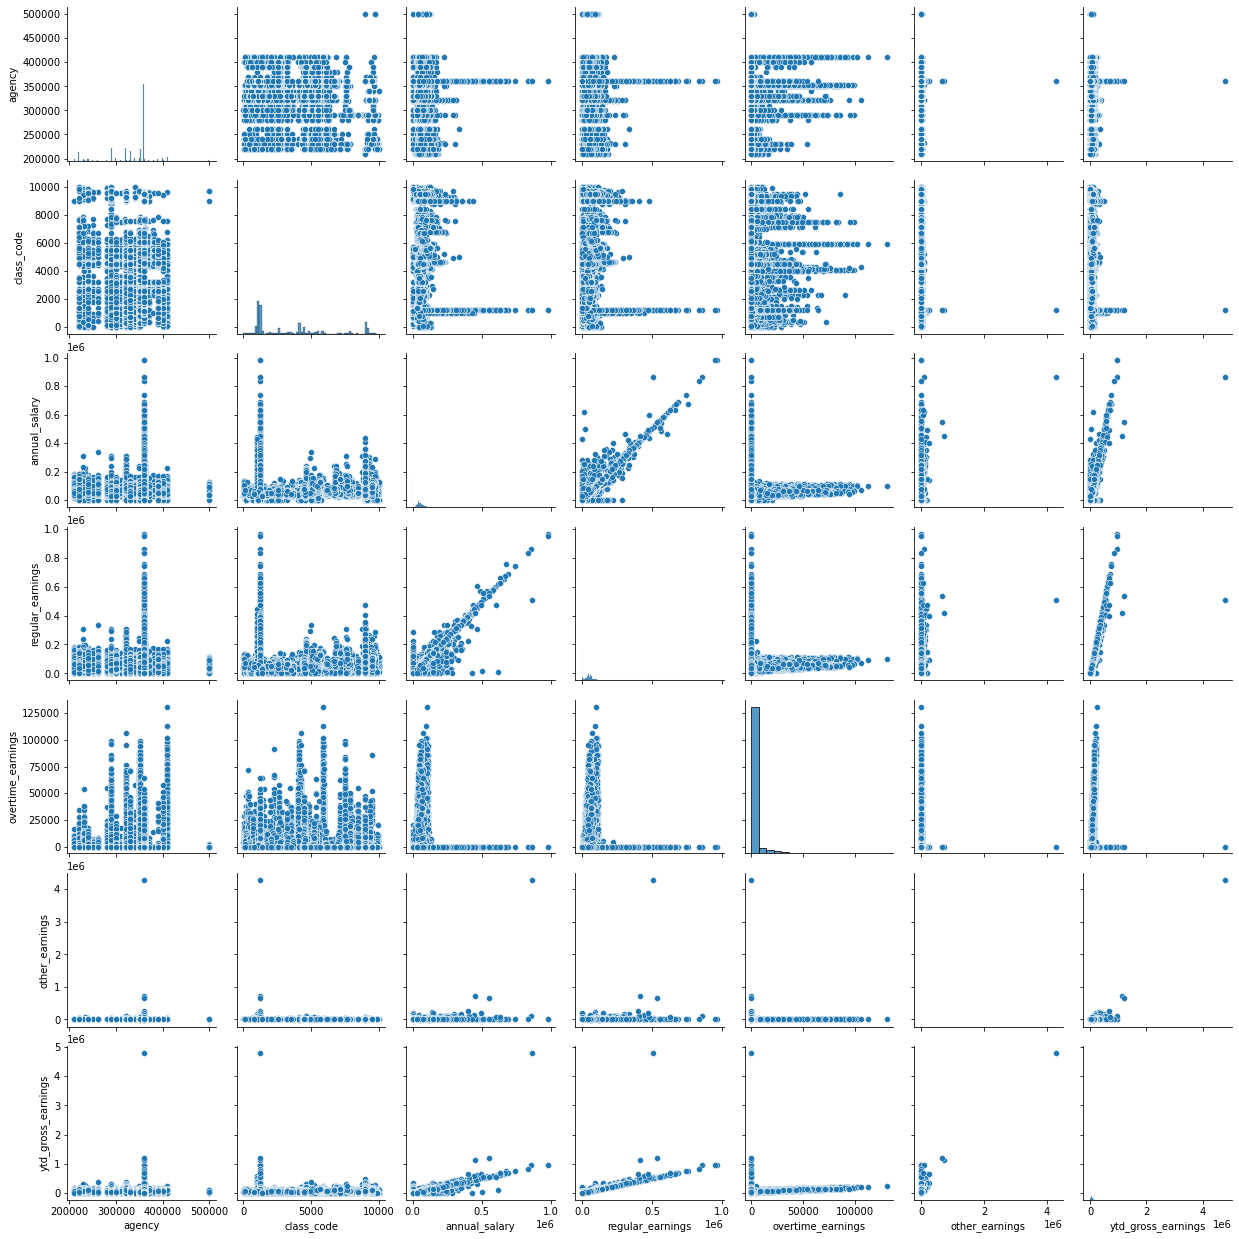

In [31]:
sns.pairplot(df,diag_kind="hist") # diag_kind is a Kind of plot for the diagonal subplots

#### (26) heatmap shows the relation between all columns of datasets. 

<AxesSubplot:>

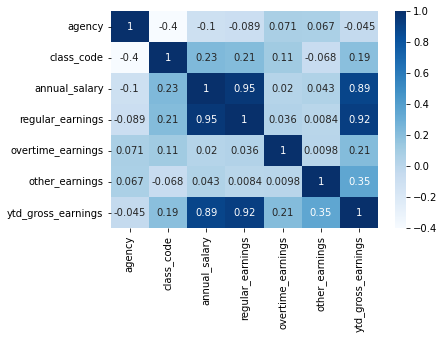

In [32]:
sns.heatmap(df.corr(), cmap='Blues',annot=True) 

In [33]:
#sns.histplot(df['annual_salary'],bins=10,kde=False,color='red')

In [34]:
#sns.histplot(df['other_earnings'],kde=False,color='blue')

In [35]:
#sns.histplot(df['regular_earnings'],bins=20,kde=True,color='red')

In [36]:
#sns.histplot(df['overtime_earnings'],bins=10,color='yellow')

#### (27) Using boxplot You can see the graph of syatem vs regular_earnings of Maryland Employee. 

<AxesSubplot:xlabel='system', ylabel='regular_earnings'>

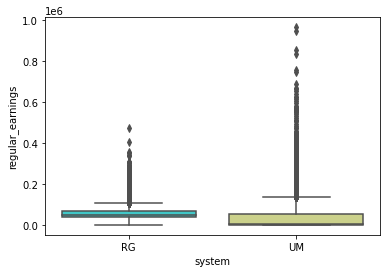

In [37]:
sns.boxplot(x='system',y='regular_earnings',data=df, palette='rainbow')

#### (28) Compare all earnings in one graph.

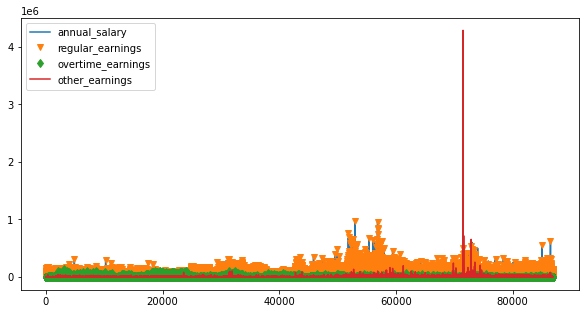

In [38]:
fig, graph = plt.subplots(figsize=(10, 5))
graph.plot(np.arange(len(df['annual_salary'])), df['annual_salary'], label='annual_salary')
graph.plot(np.arange(len(df['regular_earnings'])), df['regular_earnings'],'v',label='regular_earnings')
graph.plot(np.arange(len(df['overtime_earnings'])), df['overtime_earnings'], 'd', label='overtime_earnings')
graph.plot(np.arange(len(df['other_earnings'])), df['other_earnings'], label='other_earnings')
graph.legend(loc=2);